In [2]:
import datajoint as dj
import matplotlib.pyplot as plt
from datetime import datetime
dj.conn()

Connecting root@localhost:3306


DataJoint connection (connected) root@localhost:3306

In [3]:
from ephys import ingestion, reference, acquisition, behavior, ephys, analysis, analysis_param

# Submit a request to ingest multi-sess Unit spreadsheet

### Build the request

In [4]:
msess_unit_request = {'animal_id': '575882867c176190',
                      'datasource_id': 0, 
                      'multisess_unit_requester': 'testuser',
                      'curator': 'emiliera',
                      'spreadsheet_full_path': 'F:\Moser\Downloads\moser_multisess_unit.xlsx'}

### Submit the request

In [5]:
ingestion.MultiSessUnitRequest.insert1(msess_unit_request)

### Process the request

In [6]:
ingestion.ProcessedMultiSessUnitRequest.populate()

In [7]:
msg = ingestion.ProcessedMultiSessUnitRequest.fetch1('log_msg')

In [8]:
print(msg)

Unique unit 1 - Unchanged - 2 Member unit(s)
Unique unit 2 - Unchanged - 2 Member unit(s)
Unique unit 3 - Unchanged - 2 Member unit(s)
Unique unit 4 - Unchanged - 2 Member unit(s)
Unique unit 5 - Unchanged - 2 Member unit(s)
Unique unit 6 - Unchanged - 2 Member unit(s)
Unique unit 7 - Unchanged - 2 Member unit(s)
Unique unit 8 - Unchanged - 2 Member unit(s)
Unique unit 9 - Unchanged - 2 Member unit(s)
Unique unit 10 - Unchanged - 2 Member unit(s)
Unique unit 11 - Member unit keys error, skipped...
Unique unit 12 - Member unit keys error, skipped...
Unique unit 13 - Member unit keys error, skipped...
Unique unit 14 - Member unit keys error, skipped...
Unique unit 15 - Member unit keys error, skipped...
Unique unit 16 - Member unit keys error, skipped...
Unique unit 17 - Member unit keys error, skipped...
Unique unit 18 - Member unit keys error, skipped...
Unique unit 19 - Member unit keys error, skipped...
Unique unit 20 - Member unit keys error, skipped...
Unique unit 21 - Member unit 

# Analysis results of multi-session unit

### Select a multi-sess unit of interest

In [9]:
ephys.MultiSessUnit()

animal_id,datasource_id,insertion_time When this probe was inserted,unit_uuid,unit_name friendly unit name/id the curator name this global unit (uniqueness not enforced),curator,member_units_hash
575882867c176190,0,2019-04-04 00:00:00,136083c2-a4c0-4ccd-9d80-8c5d8a9f8c73,2,emiliera,3cdd55c7bb305efe4527f1443a5ec86b
575882867c176190,0,2019-04-04 00:00:00,2b1189d6-8f8d-4f3a-9feb-884e2de7551b,7,emiliera,567ba8e38f9ebbbb707f5ae446608c66
575882867c176190,0,2019-04-04 00:00:00,2db96ce3-f07b-4fda-9aa5-f1e078ac089d,10,emiliera,8f8c7296531882ae30ca80643862d4a7
575882867c176190,0,2019-04-04 00:00:00,30360de7-ff6e-420a-a2ee-911239ba35ac,5,emiliera,7c69e16048c9a9987626107c1de7e48a
575882867c176190,0,2019-04-04 00:00:00,701aa386-adf3-4c9c-973f-65d2b94a7a93,4,emiliera,b2dd5c434f89f6472be515059b3780c7
575882867c176190,0,2019-04-04 00:00:00,75c25ee6-016a-4b98-b85e-a662b6f695ea,31,emiliera,9f7e368bd5c04d1282a70049ab38b896
575882867c176190,0,2019-04-04 00:00:00,77db08c4-e5a2-4ae5-9487-4b3986cbfad2,3,emiliera,3f8445e58beba746637758354df00534


In [10]:
msess_unit = (ephys.MultiSessUnit & 'curator = "emiliera"' & 'unit_name = 2').fetch1('KEY')

### Get all the per-session units for the selected multi-sess unit

In [11]:
ephys.MultiSessUnit.MemberUnit & msess_unit

animal_id,datasource_id,insertion_time When this probe was inserted,unit_uuid,group_name,time_window_name unique name for this window set,"cluster_param_name some unique name, ideally reflecting the method as well","probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),sync_method sync method name,curation_timestamps ensure complete datetime here to prevent collision (in the rare case of multiple people curate at the exact same datetime),unit
575882867c176190,0,2019-04-04 00:00:00,136083c2-a4c0-4ccd-9d80-8c5d8a9f8c73,det_229a013f343836f8976421f523887bb9,full_dbd211aff6e7622a,default_mclust,4-tetrode-array,e9c6dac82a8bcb02825b0be07735a967,linear_interp,2019-09-24 13:37:20,1002
575882867c176190,0,2019-04-04 00:00:00,136083c2-a4c0-4ccd-9d80-8c5d8a9f8c73,det_82b5ff9fe7464161f05b9f9f7b9c4fe4,full_6b17f214a76ac1b8,default_mclust,4-tetrode-array,e9c6dac82a8bcb02825b0be07735a967,linear_interp,2019-09-27 14:10:10,1002


In [12]:
units = (ephys.MultiSessUnit.MemberUnit & msess_unit).fetch('KEY')

### Specify all analysis param-sets (hint: from CellAnalysisMethod)

In [13]:
cell_method = (analysis_param.FavoriteSelection & 'user = "emiliera"').fetch1('cell_analysis_method')

In [14]:
cell_method

'pass_all_method'

Here we use a helper function `analysis_param.get_method_restrictor()` that takes the `cell_analysis_method` as argument (either a string or dict). This function returns a dictionary of all analysis parameter set under the specified `cell_analysis_method`, which then can be used as restrictor. 

In [15]:
method_restrictor = analysis_param.get_method_restrictor(cell_method)  # helper function

In [16]:
method_restrictor

{'shuffle_params_name': 'default',
 'score_params_name': 'default',
 'smoothing_params_name': 'default',
 'occu_params_name': 'default',
 'field_detect_params_name': 'default',
 'cell_selection_params_name': 'pass_all'}

### Check ratemaps for the member units, computed using the specified param-sets

In [17]:
analysis.RateMap * analysis.TaskSpikesTrackingProxy & units & method_restrictor

animal_id animal,datasource_id animal,session_time start time of this session,unit unit id,task_type,task_start (s) timestamp of task onset with respect to the start of the session,task_spike_tracking_hash hash of the TaskSpikesTracking primary_key,"occu_params_name Parameter set ID, starting with 'default'",smoothing_params_name,analysis_package,cell_selection_params_name user-friendly name,"field_detect_params_name Field detection method name, starting with A",ratemap (Hz) Smoothed 2D ratemap,ratemap_mask (bool) Mask (where time = 0),ratemap_raw (Hz) Unsmoothed ratemap,fieldmap Labelled map of firing fields,field_quantity Number of firing fields,peak_rate (Hz) Peak firing rate of smoothed ratemap,mean_rate (Hz) Mean firing rate of smoothed ratemap,spatial_information_rate (bits/s) Information rate,spatial_information_content (bits/spike),spatial_coherence,selectivity,sparsity,version_ratemap e.g. opexebo_1.0.0,insertion_time When this probe was inserted,group_name,time_window_name unique name for this window set,"cluster_param_name some unique name, ideally reflecting the method as well","probe_model nick name, or other user-friendly model name of this probe",electrode_config_id hash of the group and group_member (ensure uniqueness),sync_method sync method name,curation_timestamps ensure complete datetime here to prevent collision (in the rare case of multiple people curate at the exact same datetime)
575882867c176190,0,2019-09-24 09:16:14,1002,OpenField,0.00,d8b9f846f25b1f7a205b45e13f611a69,default,default,python,pass_all,default,=BLOB=,=BLOB=,=BLOB=,=BLOB=,0,2.02407,0.164575,0.35437,1.84314,0.50669,10.5275,0.209826,Opexebo v0.4.3,2019-04-04 00:00:00,det_229a013f343836f8976421f523887bb9,full_dbd211aff6e7622a,default_mclust,4-tetrode-array,e9c6dac82a8bcb02825b0be07735a967,linear_interp,2019-09-24 13:37:20
575882867c176190,0,2019-09-24 09:33:50,1002,OpenField,0.00,7744168971199d5e3a0e43423e6d7cf4,default,default,python,pass_all,default,=BLOB=,=BLOB=,=BLOB=,=BLOB=,0,14.6407,0.190632,0.317489,4.67304,0.22681,215.494,0.0139124,Opexebo v0.4.3,2019-04-04 00:00:00,det_82b5ff9fe7464161f05b9f9f7b9c4fe4,full_6b17f214a76ac1b8,default_mclust,4-tetrode-array,e9c6dac82a8bcb02825b0be07735a967,linear_interp,2019-09-27 14:10:10


In [18]:
q_ratemap = analysis.RateMap * analysis.TaskSpikesTrackingProxy & units & method_restrictor

In [19]:
keys, ratemaps = q_ratemap.fetch('KEY', 'ratemap', order_by='session_time, task_start')

### Plot

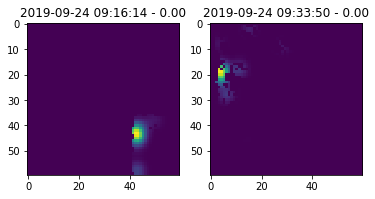

In [20]:
fig, axs = plt.subplots(1, len(keys))
for k, ratemap, ax in zip(keys, ratemaps, axs):
    ax.imshow(ratemap)
    ax.set_title(' - '.join([str(k['session_time']), str(k['task_start'])]))